<a href="https://colab.research.google.com/github/AmrHassanKhalaf/Summer_Training_NLP/blob/main/Sec_8/Task_1/Sec_8_T_1_NTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import fetch_20newsgroups

In [43]:
import pandas as pd

In [44]:
categories = [
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'soc.religion.christian',
]

In [45]:
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
data = {'text': dataset.data, 'target': dataset.target}
df = pd.DataFrame(data)

In [46]:
df.head()

,text,target
0,\n >>So good that there isn't any diff wheth...,0
1,\n\nWell I don't see any smileys here. I am t...,1
2,\n\nI haven't heard any news about ASN carryin...,1
3,"well, the subject says just about all I intend...",0
4,\n Just a quick question. If Mary was Immacu...,2


In [47]:
import re

In [48]:
# cleaning
def preprocess(text):
    text = str(text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["clean_text"] = df["text"].apply(preprocess)



In [49]:
df.drop(["text"], axis=1, inplace=True)

In [50]:
df.head()

,target,clean_text
0,0,So good that there isn t any diff whether or n...
1,1,Well I don t see any smileys here I am trying ...
2,1,I haven t heard any news about ASN carrying an...
3,0,well the subject says just about all I intende...
4,2,Just a quick question If Mary was Immaculately...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf=TfidfVectorizer(max_df=.6,min_df=.05,ngram_range=(1,3))

In [53]:
x=tfidf.fit_transform(df["clean_text"])
x.shape

(1790, 337)

In [54]:
#truncatedsvd
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=250)
x_tsvd=tsvd.fit_transform(x)
tsvd.explained_variance_ratio_.sum()

np.float64(0.937930249182695)

In [ ]:
from sklearn.cluster import KMeans

In [60]:
n_clusters = len(categories)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_tsvd)

In [61]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [62]:
ari_score = adjusted_rand_score(df['target'], cluster_labels)
silhouette_avg = silhouette_score(x_tsvd, cluster_labels)

In [70]:
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

Adjusted Rand Index: 0.320
Silhouette Score: 0.025


In [65]:
import matplotlib.pyplot as plt

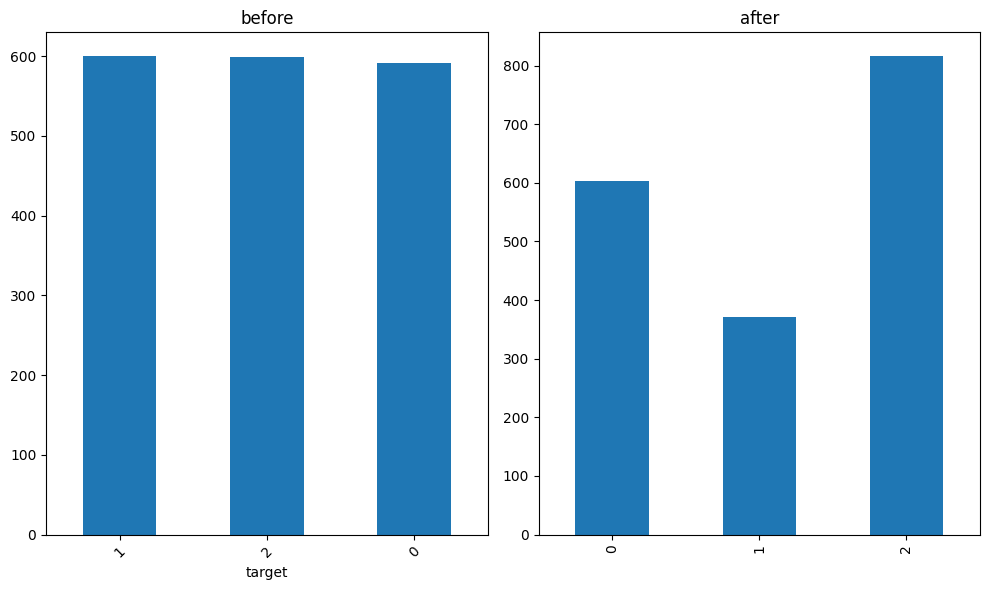

In [69]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', title='before')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
pd.Series(cluster_labels).value_counts().sort_index().plot(kind='bar', title='after')
plt.tight_layout()
plt.show()

In [63]:
# accuracy
kmeans.score(x_tsvd)

-1358.164935846065